# Projet 4 - Anticipez le retard de vol des avions

>[Projet 4 - Anticipez le retard de vol des avions](#scrollTo=4VXFEneeNhBd)

>>[1.Initialisation](#scrollTo=xSBUsnc1AvdH)

>>>[1.1.Mise à jour de librairies installées](#scrollTo=xSBUsnc1AvdH)

>>>[1.2.Import des librairies nécessaires au projet](#scrollTo=AHao4crSMyN5)

>>>[1.3.Création du contexte de mémoire](#scrollTo=WkUg-abvAvdS)

>>>[1.4.Outils de sauvegarde entre sessions](#scrollTo=jlETEw_iAvdZ)

>>>>>[a.Sauvegarde du dataframe](#scrollTo=k8vcfiC4Avdb)

>>>>>[b.Point de restauration _ Chargement du dataframe](#scrollTo=DerCVHhLAvdl)

>>>[1.5.Point de restauration](#scrollTo=OFsQgn3b18M-)

>>[2.Comparaison des modèles](#scrollTo=UUBB2aVQN3pd)

>>>[2.1.Standardisation des données](#scrollTo=fxuFPjZxOTFY)

>>>[2.2.Régression classique](#scrollTo=W2Db3oZ618Nf)

>>>[2.3.Ridge](#scrollTo=_yP_72HB18Nu)

>>>>[a. recherche manuelle du coefficient de régularisation](#scrollTo=Sjhku2iqPHqN)

>>>>[b. recherche du coefficient de régularisation avec GridSearchCV](#scrollTo=age8QCrE18N6)

>>>[2.4.Lasso](#scrollTo=TopR1mPP18Od)

>>>>[Recherche du coefficient de régularisation avec GridSearchCV](#scrollTo=Zt-ZyCi318Oq)

>>>[2.5.Dummy Regressor](#scrollTo=x7ueLHQFAvjI)

>>[3.Sélection de modèle](#scrollTo=MH7J6WHGAviB)

>>>>[3.1.Export de la régression avec joblib](#scrollTo=GfwhebJh18Pf)

>>[4.Pour aller plus loin](#scrollTo=g0w5NS0JE1ih)

>>>[4.1.Régression polynomiale - degré 2](#scrollTo=m5n3RbZMTttz)

>>>[4.2.Régression polynomiale - degré 3](#scrollTo=BUox831TW50K)



## 1.Initialisation
### 1.1.Mise à jour de librairies installées


In [27]:
!pip install --upgrade numpy

Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.16.2)


In [28]:
!pip install --upgrade pandas

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (0.24.1)


### 1.2.Import des librairies nécessaires au projet

In [0]:
# Import the `pandas` library as `pd`
import pandas as pd

# Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt

# Import the `numpy` library as `np`
import numpy as np

# Import de la librairie os
import os

# Import de la librairie math
from math import sqrt

# Import de la librairie joblib
from joblib import dump, load

# Import des modèles de validation croisée
from sklearn.model_selection import GridSearchCV, train_test_split #, train_test_split, KFold 

# from sklearn import preprocessing, linear_model

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import Ridge, Lasso, LinearRegression

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.pipeline import Pipeline

from sklearn.dummy import DummyRegressor



### 1.3.Création du contexte de mémoire

In [30]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# cache directory for joblib objects
folder = "/content/gdrive/My Drive/Colab Notebooks/joblib_memmap/"
try:
    os.mkdir(folder)
except FileExistsError:
    pass

### 1.4.Outils de sauvegarde entre sessions

##### a.Sauvegarde du dataframe

In [0]:
#dump(global_df, data_filename_memmap)

##### b.Point de restauration _ Chargement du dataframe

In [0]:
# data = load(data_filename_memmap, mmap_mode='r')

In [0]:
# data

### 1.5.Point de restauration
On charge les jeux de test et entrainement créés dans le notebook de première partie.

In [0]:
#Jeu d'entrainement
data_filename_memmap = os.path.join(folder, 'X_feat_memmap')
X_train = load(data_filename_memmap, mmap_mode='r')

data_filename_memmap = os.path.join(folder, 'y_train_memmap')
y_train = load(data_filename_memmap, mmap_mode='r')

# Jeu de test
data_filename_memmap = os.path.join(folder, 'X_test_memmap')
X_test = load(data_filename_memmap, mmap_mode='r')

data_filename_memmap = os.path.join(folder, 'y_test_memmap')
y_test = load(data_filename_memmap, mmap_mode='r')

In [36]:
X_train.head()

,DAY_OF_WEEK,MONTH,19393,19690,19790,19805,19930,19977,20304,20366,20409,20416,20436,21171,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME_BLK,HDAYS
1595750,3,1,0,0,1,0,0,0,0,0,0,0,0,0,2,2,8.432132,32
793893,2,1,1,0,0,0,0,0,0,0,0,0,0,0,2,2,-3.708017,7
2486071,1,2,1,0,0,0,0,0,0,0,0,0,0,0,3,3,-3.708017,16
2715949,1,2,0,0,0,1,0,0,0,0,0,0,0,0,3,3,-3.708017,16
2270372,3,1,0,0,0,0,1,0,0,0,0,0,0,0,3,2,-5.508442,18


## 2.Comparaison des modèles

### 2.1.Standardisation des données

In [37]:
std_scale = StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
# Sauvegarde
data_filename_memmap = os.path.join(folder, 'std_memmap')
dump(std_scale, data_filename_memmap)

['/content/gdrive/My Drive/Colab Notebooks/joblib_memmap/std_memmap']

### 2.2.Régression classique

In [39]:
# On crée un modèle de régression linéaire
lr = LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lr.fit(X_train_std,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
#Vérification des performances sur l'ensemble de test
y_pred = lr.predict(X_test_std)

In [41]:
#from sklearn import metrics
lr_error = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE avec reg. lin.: {}".format(lr_error))
      
lr_r2 = r2_score(y_test, y_pred)
print("Coef. de détermination avec reg. lin.: {}".format(lr_r2))

RMSE avec reg. lin.: 38.01440179773729
Coef. de détermination avec reg. lin.: 0.02025879081167603


In [42]:
lr.coef_

array([ 8.46169815e-01,  2.43496902e+00, -1.82366975e+12, -5.03922880e+11,
       -1.63959574e+12, -1.57531054e+12, -7.37206144e+11, -1.28041676e+12,
       -1.33735912e+12, -1.22564344e+12, -9.46794338e+11, -6.67287296e+11,
       -5.57836908e+11, -4.71717906e+11,  9.84349034e-01,  1.53091194e+00,
        3.53659257e+00,  6.05003916e-01])

In [43]:
# Sauvegarde
data_filename_memmap = os.path.join(folder, 'reg_memmap')
dump(lr, data_filename_memmap)

['/content/gdrive/My Drive/Colab Notebooks/joblib_memmap/reg_memmap']

### 2.3.Ridge

#### a. recherche manuelle du coefficient de régularisation

In [0]:
# n_alphas = 200
n_alphas = 20
alphas = np.logspace(-5, 10, n_alphas)

In [0]:
ridge = Ridge()

coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train_std, y_train)
    coefs.append(ridge.coef_)
    y_pred_ridge = ridge.predict(X_test_std)
    errors.append([lr_error, sqrt(mean_squared_error(y_test, y_pred_ridge))])

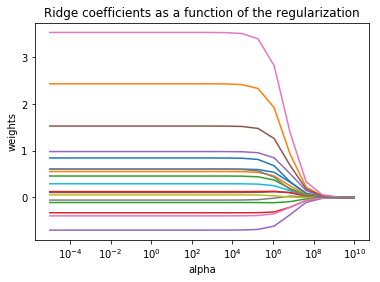

In [46]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

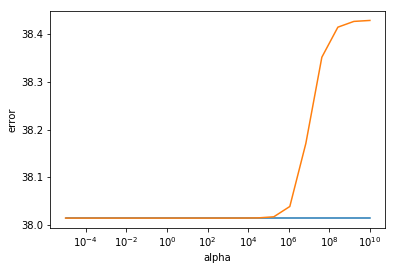

In [47]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

Le coefficient de régularisation optimal est autour de 10 ** (4). Par contre, il n'y a pa de minimisation de l'erreur, mais plutot un seuil au dela duquel l'erreur augmente considérablement.

#### b. recherche du coefficient de régularisation avec GridSearchCV

In [48]:
model = Ridge()
grid = GridSearchCV(estimator=model,    #algorithme
                    param_grid  = dict(alpha=alphas),    # grille des hyperparamètres de l'algorithme
                    cv = 5,   # nb de folds de validation croisée
                    scoring = 'neg_mean_squared_error',                   # score à optimiser
                    n_jobs = -1)
grid.fit(X_train_std, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': array([1.00000e-05, 6.15848e-05, 3.79269e-04, 2.33572e-03, 1.43845e-02,
       8.85867e-02, 5.45559e-01, 3.35982e+00, 2.06914e+01, 1.27427e+02,
       7.84760e+02, 4.83293e+03, 2.97635e+04, 1.83298e+05, 1.12884e+06,
       6.95193e+06, 4.28133e+07, 2.63665e+08, 1.62378e+09, 1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [49]:
# affichage du meilleur hyperparamètre sélectionné
print("Meilleur hyperparamètre: {} - score associé: {}".format(grid.best_params_, grid.best_score_))

Meilleur hyperparamètre: {'alpha': 127.42749857031347} - score associé: -768.1302920451899


In [50]:
# Affichage des performances pour chacun des hyperparamètres
for mean, std, params in zip(grid.cv_results_['mean_test_score'],
                             grid.cv_results_['std_test_score'],
                             grid.cv_results_['params']
                            ):
    print("\taccuracy = %0.3f (+/-%0.3f) for %s" % (mean,
                                                   std * 2,
                                                   params))

	accuracy = -768.130 (+/-5.072) for {'alpha': 1e-05}
	accuracy = -768.130 (+/-5.072) for {'alpha': 6.158482110660267e-05}
	accuracy = -768.130 (+/-5.072) for {'alpha': 0.000379269019073225}
	accuracy = -768.130 (+/-5.072) for {'alpha': 0.002335721469090121}
	accuracy = -768.130 (+/-5.072) for {'alpha': 0.01438449888287663}
	accuracy = -768.130 (+/-5.072) for {'alpha': 0.08858667904100832}
	accuracy = -768.130 (+/-5.072) for {'alpha': 0.5455594781168515}
	accuracy = -768.130 (+/-5.072) for {'alpha': 3.359818286283781}
	accuracy = -768.130 (+/-5.072) for {'alpha': 20.6913808111479}
	accuracy = -768.130 (+/-5.072) for {'alpha': 127.42749857031347}
	accuracy = -768.130 (+/-5.072) for {'alpha': 784.7599703514622}
	accuracy = -768.130 (+/-5.072) for {'alpha': 4832.930238571752}
	accuracy = -768.132 (+/-5.072) for {'alpha': 29763.51441631313}
	accuracy = -768.186 (+/-5.072) for {'alpha': 183298.07108324376}
	accuracy = -769.509 (+/-5.072) for {'alpha': 1128837.8916846884}
	accuracy = -779.080

In [0]:
# grid.cv_results_

In [52]:
#Vérification des performances sur l'ensemble de test
y_pred = grid.predict(X_test_std)


ridge_error = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE avec Ridge: {}'.format(ridge_error))
      
ridge_r2 = r2_score(y_test, y_pred)
print("Coef. de détermination avec Ridge: {}".format(ridge_r2))

RMSE avec Ridge: 38.01443471444999
Coef. de détermination avec Ridge: 0.020257094092941075


Ridge n'améliore pas les performance de la modélisation.

In [0]:
sizes = {} # clé : coordonnées ; valeur : nombre de points à ces coordonnées
for (yt, yp) in zip(list(y_test), list(y_pred)):
    if (yt, yp) in sizes:
        sizes[(yt, yp)] += 1
    else:
        sizes[(yt, yp)] = 1

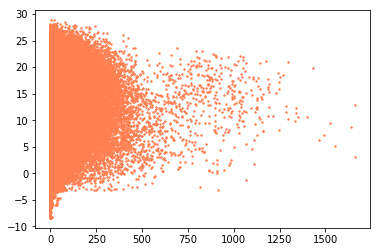

In [54]:
keys = sizes.keys()
plt.scatter([k[0] for k in keys], # vraie valeur (abscisse)
            [k[1] for k in keys], # valeur predite (ordonnee)
            #s=[sizes[k] for k in keys], # taille du marqueur
            s=2,
            color='coral')

### 2.4.Lasso


#### Recherche du coefficient de régularisation avec GridSearchCV

In [0]:
n_alphas = 20
alphas = np.logspace(0, 3, n_alphas)

In [56]:
alphas

array([   1.        ,    1.43844989,    2.06913808,    2.97635144,
          4.2813324 ,    6.15848211,    8.8586679 ,   12.74274986,
         18.32980711,   26.36650899,   37.92690191,   54.55594781,
         78.47599704,  112.88378917,  162.37767392,  233.57214691,
        335.98182863,  483.29302386,  695.19279618, 1000.        ])

In [0]:
model = Lasso()

In [0]:
grid = GridSearchCV(estimator=model,    #algorithme
                    param_grid  = dict(alpha=alphas),    # grille des hyperparamètres de l'algorithme
                    cv = 5,   # nb de folds de validation croisée
                    scoring = 'neg_mean_squared_error',                   # score à optimiser
#                     n_jobs = -1
                   )

In [59]:
grid.fit(X_train_std, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([   1.     ,    1.43845,    2.06914,    2.97635,    4.28133,
          6.15848,    8.85867,   12.74275,   18.32981,   26.36651,
         37.9269 ,   54.55595,   78.476  ,  112.88379,  162.37767,
        233.57215,  335.98183,  483.29302,  695.1928 , 1000.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [60]:
# affichage du meilleur hyperparamètre sélectionné
print(grid.best_params_)

print(grid.best_score_)

print(grid.best_estimator_.alpha)

# Affichage des performances pour chacun des hyperparamètres
# for mean, std, params in zip(grid.cv_results_['mean_test_score'],
#                              grid.cv_results_['std_test_score'],
#                              grid.cv_results_['params']
#                             ):
#     print("\taccuracy = %0.3f (+/-%0.3f) for %s" % (mean,
#                                                    std * 2,
#                                                    params))
for mean, std, params in zip(grid.cv_results_['mean_test_score'],
                             grid.cv_results_['std_test_score'],
                             grid.cv_results_['params']
                            ):
    print("\taccuracy = %0.3f (+/-%0.3f) for %s" % (mean,
                                                   std * 2,
                                                   params))

{'alpha': 1.0}
-774.5364620623899
1.0
	accuracy = -774.536 (+/-5.076) for {'alpha': 1.0}
	accuracy = -778.486 (+/-5.037) for {'alpha': 1.4384498882876628}
	accuracy = -785.178 (+/-5.035) for {'alpha': 2.0691380811147897}
	accuracy = -791.081 (+/-5.071) for {'alpha': 2.976351441631318}
	accuracy = -795.280 (+/-5.068) for {'alpha': 4.281332398719393}
	accuracy = -795.280 (+/-5.068) for {'alpha': 6.158482110660264}
	accuracy = -795.280 (+/-5.068) for {'alpha': 8.858667904100825}
	accuracy = -795.280 (+/-5.068) for {'alpha': 12.742749857031335}
	accuracy = -795.280 (+/-5.068) for {'alpha': 18.329807108324356}
	accuracy = -795.280 (+/-5.068) for {'alpha': 26.366508987303583}
	accuracy = -795.280 (+/-5.068) for {'alpha': 37.926901907322495}
	accuracy = -795.280 (+/-5.068) for {'alpha': 54.55594781168517}
	accuracy = -795.280 (+/-5.068) for {'alpha': 78.47599703514611}
	accuracy = -795.280 (+/-5.068) for {'alpha': 112.88378916846884}
	accuracy = -795.280 (+/-5.068) for {'alpha': 162.377673918

In [0]:
#Vérification des performances sur l'ensemble de test
y_pred = grid.predict(X_test_std)

In [62]:
#from sklearn import metrics
lasso_error = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE avec Lasso: {}'.format(lasso_error))

lasso_r2 = r2_score(y_test, y_pred)
print("Coef. de détermination avec Lasso: {}".format(lasso_r2))

RMSE avec Lasso: 38.12750265053236
Coef. de détermination avec Lasso: 0.014420245316810076


Lasso n'améliore pas non plus les performances de la modélisation. Il n'est donc pas utile d'essayer elastic net.

### 2.5.Dummy Regressor

In [63]:
dum = DummyRegressor(strategy='mean')

# Entraînement
dum.fit(X_train_std, y_train)

# Prédiction sur le jeu de test
y_pred = dum.predict(X_test_std)

# Evaluate
print("RMSE avec Dummy: %.2f" % sqrt(mean_squared_error(y_test, y_pred)))
print("Coef. de détermination avec Dummy: %.2f" % r2_score(y_test, y_pred))

RMSE avec Dummy: 38.43
Coef. de détermination avec Dummy: -0.00


## 3.Sélection de modèle
Après comparaison des performances, on conserve la régression linéaire classique que l'on va exporter dans notre API à l'aide de Joblib.

On note cependant que les performances ne sont pas très bonnes, car elles améliorent très peu les résultats, par rapport au Dummy regressor.

#### 3.1.Export de la régression avec joblib
On exporte la régression, et on fera un predict depuis les caractéristiques saisies pour obtenir la prédiction du retard.

In [64]:
# Sauvegarde
data_filename_memmap = os.path.join(folder, 'reg_memmap')
dump(lr, data_filename_memmap)

['/content/gdrive/My Drive/Colab Notebooks/joblib_memmap/reg_memmap']

## 4.Pour aller plus loin
On souhaiterai tester la régression polynomiale afin de voir si une régression non-linéaire nous donne de meilleurs résultats.
Malheureusement, les ressources nécessaires à l'exécution sont très supérieures à celles des modèles linéaires (on ajoute des dimensions), et ne permettent pas de le tester sur le jeu complet.

On réduit par conséquent la taille du jeu d'entrainement:

In [0]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_train_std,
                                                                        y_train,
                                                                        train_size = 100000,
                                                                        test_size=0.2,
                                                                       )
#                                                                        stratify= X_train_std[1])
# On génère le dataset d'entrainement, et celui de test

### 4.1.Régression polynomiale - degré 2

In [0]:
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])

# fit to an order-2 polynomial data
model = model.fit(X_train_poly, y_train_poly)
# model.named_steps['linear'].coef_

In [67]:
# Prédiction sur le jeu de test
y_pred = model.predict(X_test_std)

# Evaluate
print("RMSE avec polyn. degré 2: %.2f" % sqrt(mean_squared_error(y_test, y_pred)))
print("Coef. de détermination avec polyn. degré 2: %.2f" % r2_score(y_test, y_pred))

RMSE avec polyn. degré 2: 37.92
Coef. de détermination avec polyn. degré 2: 0.03


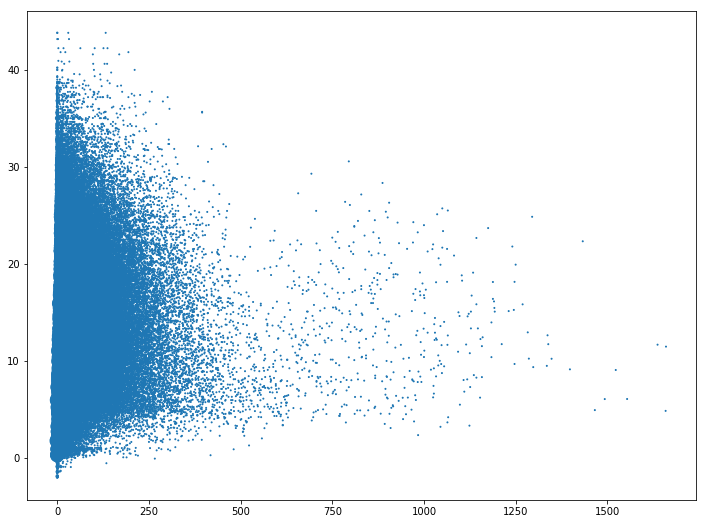

In [0]:
sizes = {} # clé : coordonnées ; valeur : nombre de points à ces coordonnées
for (yt, yp) in zip(list(y_test), list(y_pred_poly)):
    if (yt, yp) in sizes:
        sizes[(yt, yp)] += 1
    else:
        sizes[(yt, yp)] = 1

keys = sizes.keys()
plt.figure(1, figsize=(12, 9))
plt.scatter([k[0] for k in keys], # vraie valeur (abscisse)
            [k[1] for k in keys], # valeur predite (ordonnee)
            s=[sizes[k] for k in keys], # taille du marqueur
           )
#             color='coral')

### 4.2.Régression polynomiale - degré 3

In [0]:
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])

# fit to an order-2 polynomial data
model = model.fit(X_train_poly, y_train_poly)
# model.named_steps['linear'].coef_

In [0]:
# Prédiction sur le jeu de test
y_pred = model.predict(X_test_std)

# Evaluate
print("RMSE : %.2f" % sqrt(mean_squared_error(y_test, y_pred)))

RMSE avant suppression des outliers:
* Linear reg - 46.19
* Ridge - 46.19
* Lasso - 
* Dummy - 46.52


RMSE après suppression des outliers(.99):
* Linear reg - 37.98
* Ridge - 37.98
* Lasso - 38.05
* Dummy - 38.21

RMSE après ajout heure de départ (moy_n par créneau):
* Linear reg - 37.71
* Ridge - 37.71
* Lasso - 37.81
* Dummy - 38.11

RMSE après ajout heure de départ (one hot encoder):
* Linear reg - 38.18
* Ridge - 38.18
* Lasso - 38.40
* Dummy - 38.58

Reg Polynomiale (réduction à 100000 enregistrements):
* degré 2: 37.93
* degré 3: - -